In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("data/bank-full.csv")

In [3]:
# my computer cannot operate on so many rows
df_reduced, _ = train_test_split(df, train_size=0.1, shuffle=True)

In [4]:
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5805,28,technician,married,secondary,no,880,yes,no,unknown,26,may,188,1,-1,0,unknown,no
45144,60,admin.,divorced,secondary,no,683,no,no,cellular,8,nov,507,1,-1,0,unknown,no
405,50,management,married,tertiary,no,0,no,no,unknown,6,may,326,1,-1,0,unknown,no
28194,47,retired,divorced,secondary,no,47,no,no,cellular,29,jan,489,1,-1,0,unknown,no
5525,33,management,single,tertiary,no,2599,yes,no,unknown,23,may,328,3,-1,0,unknown,no


In [5]:
df_reduced.shape

(4521, 17)

In [6]:
for column in df_reduced.columns:
    print(f'column "{column}" has {len(df_reduced[column].unique())} unique values')

column "age" has 68 unique values
column "job" has 12 unique values
column "marital" has 3 unique values
column "education" has 4 unique values
column "default" has 2 unique values
column "balance" has 2335 unique values
column "housing" has 2 unique values
column "loan" has 2 unique values
column "contact" has 3 unique values
column "day" has 31 unique values
column "month" has 12 unique values
column "duration" has 865 unique values
column "campaign" has 33 unique values
column "pdays" has 300 unique values
column "previous" has 27 unique values
column "poutcome" has 4 unique values
column "y" has 2 unique values


In [7]:
def encode(p_df):
    r_df = p_df.copy(deep = True)
    
    job_map = {value: key for key, value in enumerate(r_df["job"].unique())}
    marital_map = {value: key for key, value in enumerate(r_df["marital"].unique())}
    education_map = {value: key for key, value in enumerate(r_df["education"].unique())}
    contact_map = {value: key for key, value in enumerate(r_df["contact"].unique())}
    month_map = {value: key for key, value in enumerate(r_df["month"].unique())}
    poutcome_map = {value: key for key, value in enumerate(r_df["poutcome"].unique())}
    
    default_map = {value: key for key, value in enumerate(r_df["default"].unique())}
    housing_map = {value: key for key, value in enumerate(r_df["housing"].unique())}
    loan_map = {value: key for key, value in enumerate(r_df["loan"].unique())}
    y_map = {value: key for key, value in enumerate(r_df["y"].unique())}
    
    r_df["job"] = r_df["job"].map(job_map)
    r_df["marital"] = r_df["marital"].map(marital_map)
    r_df["education"] = r_df["education"].map(education_map)
    r_df["default"] = r_df["default"].map(default_map)
    r_df["housing"] = r_df["housing"].map(housing_map)
    r_df["loan"] = r_df["loan"].map(loan_map)
    r_df["contact"] = r_df["contact"].map(contact_map)
    r_df["month"] = r_df["month"].map(month_map)
    r_df["poutcome"] = r_df["poutcome"].map(poutcome_map)
    r_df["y"] = r_df["y"].map(y_map)
    
    return r_df

In [8]:
def scale(p_df):
    r_df = p_df.copy(deep = True)
    
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(r_df)
    
    return pd.DataFrame(data_scaled, columns = df.columns)

In [9]:
def var(p_df):
    pca = PCA(n_components=0.75)
    pca.fit(p_df)
    transformed = pca.transform(p_df)
    return pd.DataFrame(transformed, columns=range(pca.n_components_))

In [10]:
df_encoded = encode(df_reduced)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5805,28,0,0,0,0,880,0,0,0,26,0,188,1,-1,0,0,0
45144,60,1,1,0,0,683,1,0,1,8,1,507,1,-1,0,0,0
405,50,2,0,1,0,0,1,0,0,6,0,326,1,-1,0,0,0
28194,47,3,1,0,0,47,1,0,1,29,2,489,1,-1,0,0,0
5525,33,2,2,1,0,2599,0,0,0,23,0,328,3,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37524,29,4,2,3,0,1768,0,0,1,13,0,426,3,344,1,3,0
11621,43,1,2,2,0,682,1,0,0,19,4,156,6,-1,0,0,0
44393,33,0,0,0,0,1026,1,0,1,3,3,326,2,340,3,1,0
43273,79,3,0,3,0,3025,1,0,2,11,11,184,1,90,6,2,0


In [11]:
df_scaled = scale(df_encoded)
df_scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.187490,-1.231652,-0.771518,-0.767312,-0.147292,-0.165082,-0.884322,-0.430907,-1.449406,1.208968,-1.087309,-0.264978,-0.580084,-0.424579,-0.295040,-0.427215,-0.377534
1,1.807150,-0.871244,0.357295,-0.767312,-0.147292,-0.234149,1.130809,-0.430907,0.402181,-0.957781,-0.742225,0.939228,-0.580084,-0.424579,-0.295040,-0.427215,-0.377534
2,0.871325,-0.510837,-0.771518,0.181544,-0.147292,-0.473605,1.130809,-0.430907,-1.449406,-1.198531,-1.087309,0.255964,-0.580084,-0.424579,-0.295040,-0.427215,-0.377534
3,0.590578,-0.150429,0.357295,-0.767312,-0.147292,-0.457127,1.130809,-0.430907,0.402181,1.570093,-0.397141,0.871279,-0.580084,-0.424579,-0.295040,-0.427215,-0.377534
4,-0.719577,-0.510837,1.486108,0.181544,-0.147292,0.437592,-0.884322,-0.430907,-1.449406,0.847843,-1.087309,0.263514,0.064914,-0.424579,-0.295040,-0.427215,-0.377534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-1.093907,0.209979,1.486108,2.079257,-0.147292,0.146247,-0.884322,-0.430907,0.402181,-0.355906,-1.087309,0.633458,0.064914,2.877118,0.174800,3.538775,-0.377534
4517,0.216248,-0.871244,1.486108,1.130401,-0.147292,-0.234499,1.130809,-0.430907,-1.449406,0.366344,0.293028,-0.385776,1.032410,-0.424579,-0.295040,-0.427215,-0.377534
4518,-0.719577,-1.231652,-0.771518,-0.767312,-0.147292,-0.113895,1.130809,-0.430907,0.402181,-1.559656,-0.052056,0.255964,-0.257585,2.838837,1.114480,0.894782,-0.377534
4519,3.585218,-0.150429,-0.771518,2.079257,-0.147292,0.586945,1.130809,-0.430907,2.253767,-0.596656,2.708616,-0.280078,-0.580084,0.446304,2.523999,2.216779,-0.377534


In [12]:
df_pca = var(df_scaled)
df_pca

,0,1,2,3,4,5,6,7,8,9
0,-1.240327,-1.782513,0.253924,0.324388,0.107855,1.130935,-1.323782,0.277753,-0.468034,-0.648893
1,-0.432757,0.972415,0.032484,0.736725,-0.880360,-0.277709,-0.995572,1.019554,-0.554445,-0.269217
2,-1.067179,-0.025201,-0.595421,1.576435,-0.663166,-0.476736,-0.327758,0.828693,-0.867138,0.012007
3,-0.638778,0.714229,0.499675,-0.324951,0.356528,0.679518,-0.438104,0.185225,-0.344243,-1.009913
4,-1.047693,-1.661120,0.863793,0.350078,1.351468,0.560450,-0.567845,0.668528,-0.039447,0.795765
...,...,...,...,...,...,...,...,...,...,...
4516,3.792651,-1.873475,-0.339248,0.548396,1.537910,-0.143417,0.918781,0.289221,-0.411762,1.694360
4517,-1.123353,0.222707,-0.001007,-0.681989,1.211782,-0.154774,0.014982,0.856595,-1.117658,1.565876
4518,2.757214,-0.244631,-0.334251,-0.104969,-0.851767,-0.470176,-1.034146,0.612193,-0.640656,-0.233618
4519,3.359129,3.661487,-3.368652,-0.083868,-0.533770,-1.069771,0.402486,0.322628,-0.499871,0.472605


In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE

In [14]:
def c_dendrogram(p_df, p_method):
    mergings = linkage(p_df, method=p_method)
    dendrogram(mergings, leaf_rotation=90, leaf_font_size=2)
    plt.show()
    
    return mergings

In [15]:
def c_labels(p_mergings, p_fcluster_level):
    return fcluster(p_mergings, p_fcluster_level, criterion='distance')

In [16]:
def c_tsne(p_df, columns):
    for columns in columns:
        print(f"COLUMN '{columns}'")
        model_2d = TSNE(learning_rate=200)
        transformed = model_2d.fit_transform(p_df)
        xs = transformed[:, 0]
        ys = transformed[:, 1]
        plt.scatter(xs, ys, c=p_df[columns])
        plt.show()

        model_3d = TSNE(n_components=3, learning_rate=200)
        transformed = model_3d.fit_transform(p_df)
        xs = transformed[:, 0]
        ys = transformed[:, 1]
        zs = transformed[:, 2]
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        sc = ax.scatter(xs, ys, zs, c=p_df[columns], alpha=0.6, edgecolors='w')
        plt.colorbar(sc, label='cluster')
        plt.show()
        print()

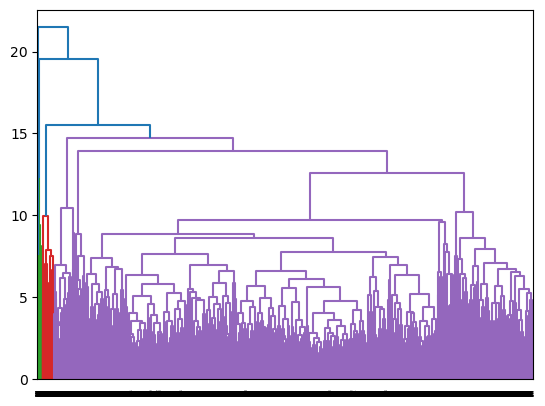

In [17]:
merg_complete = c_dendrogram(df_pca, 'complete')

In [18]:
df_scaled["labels_complete"] = c_labels(merg_complete, 10.5)

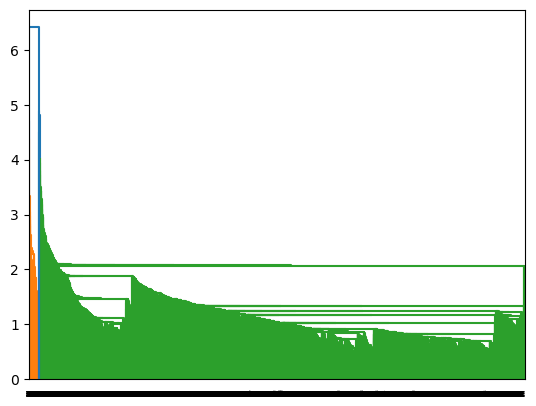

In [19]:
merg_single = c_dendrogram(df_pca, 'single')

In [20]:
df_scaled["labels_single"] = c_labels(merg_single, 5.5)

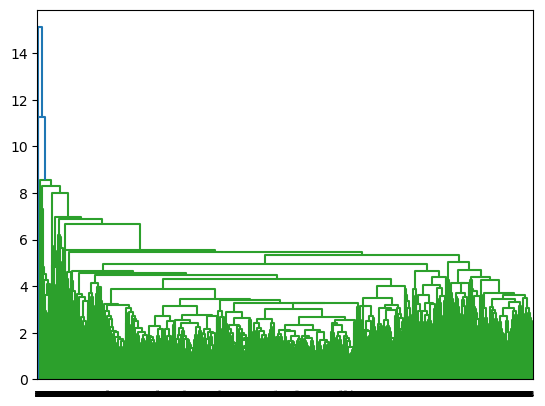

In [21]:
merg_average = c_dendrogram(df_pca, 'average')

In [22]:
df_scaled["labels_average"] = c_labels(merg_average, 7.75)

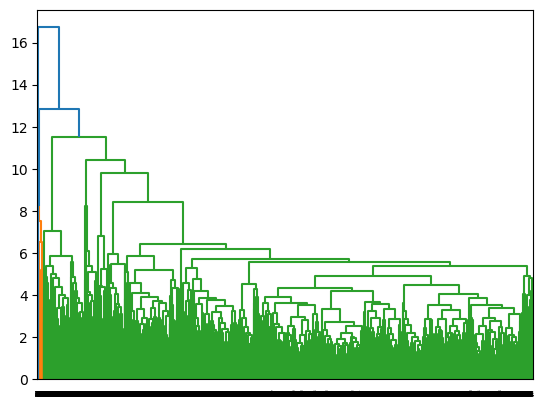

In [23]:
merg_weighted = c_dendrogram(df_pca, 'weighted')

In [24]:
df_scaled["labels_weighted"] = c_labels(merg_weighted, 8)

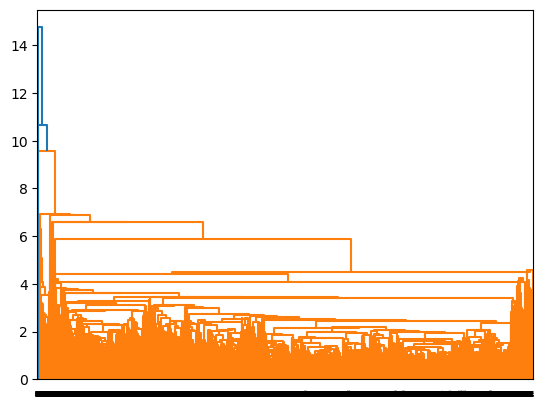

In [25]:
merg_centroid = c_dendrogram(df_pca, 'centroid')

In [26]:
df_scaled["labels_centroid"] = c_labels(merg_centroid, 6)

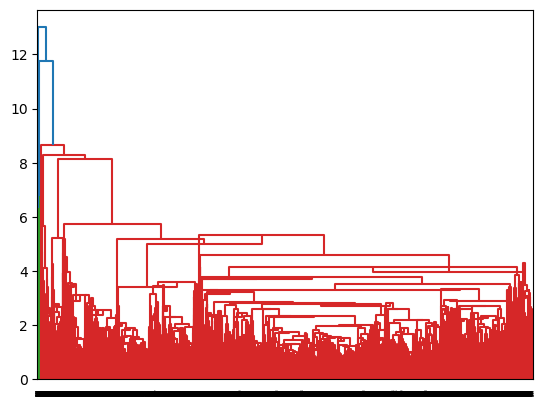

In [27]:
merg_median = c_dendrogram(df_pca, 'median')

In [28]:
df_scaled["labels_median"] = c_labels(merg_median, 6)

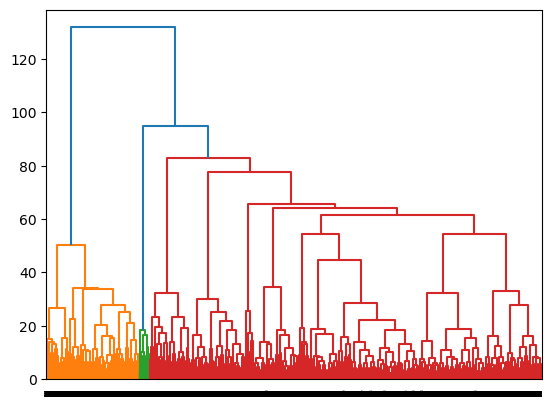

In [29]:
merg_ward = c_dendrogram(df_pca, 'ward')

In [30]:
df_scaled["labels_ward"] = c_labels(merg_ward, 15)

COLUMN 'labels_complete'


F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


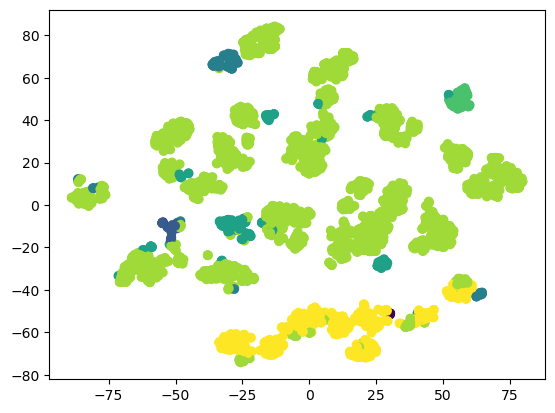

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


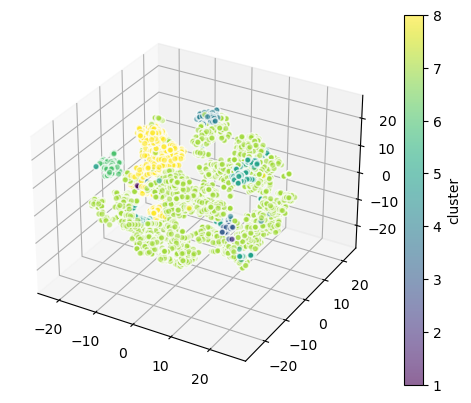


COLUMN 'labels_single'


F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


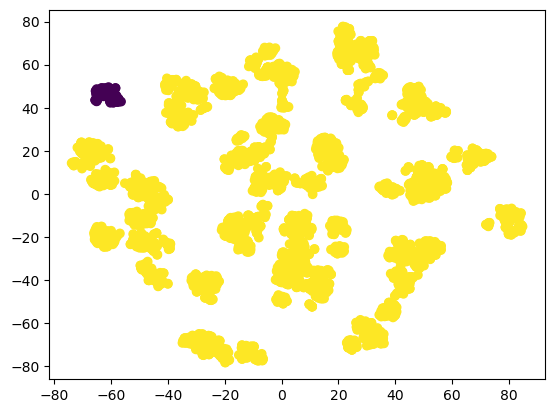

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


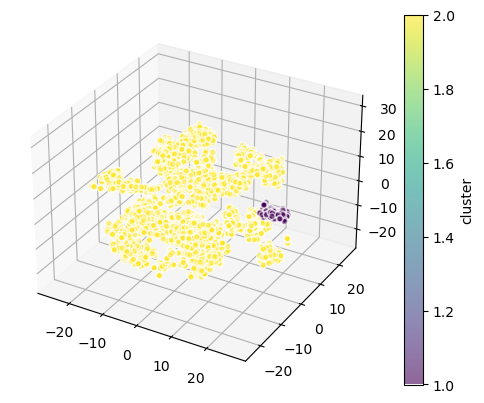


COLUMN 'labels_average'


F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


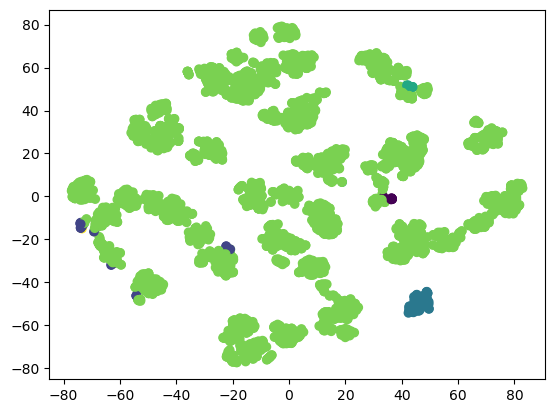

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


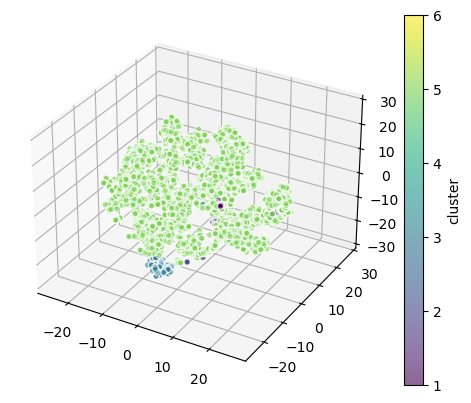


COLUMN 'labels_weighted'


F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


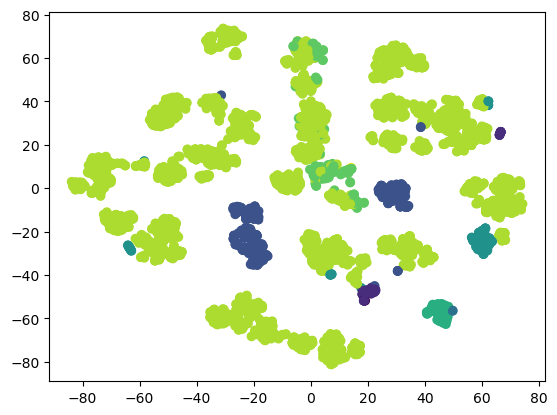

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


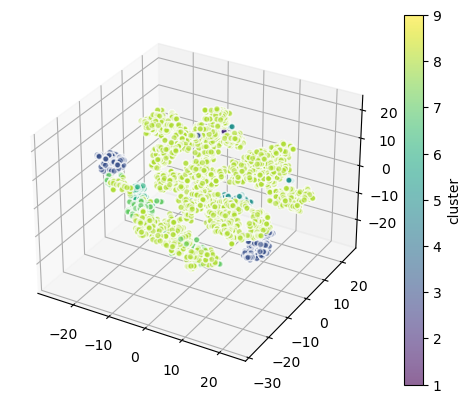


COLUMN 'labels_centroid'


F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


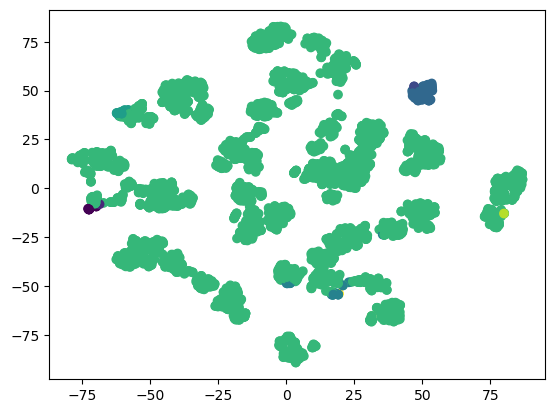

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


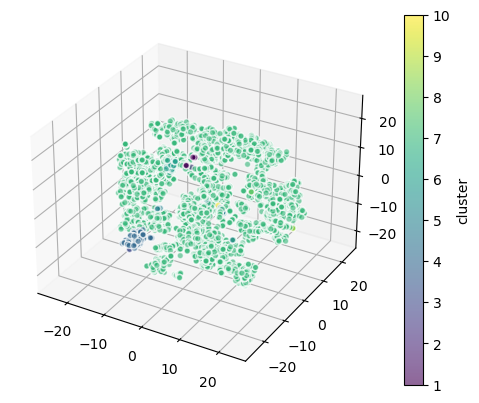


COLUMN 'labels_median'


F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


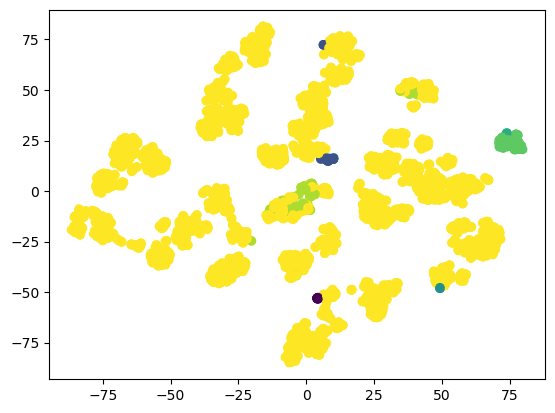

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


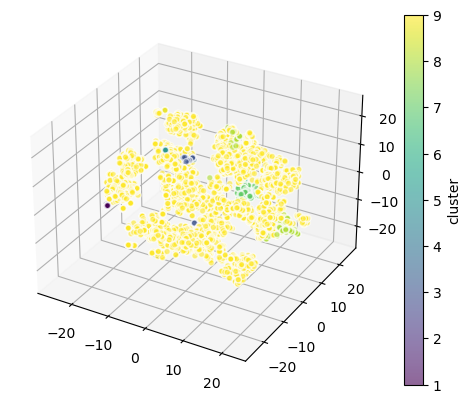


COLUMN 'labels_ward'


F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


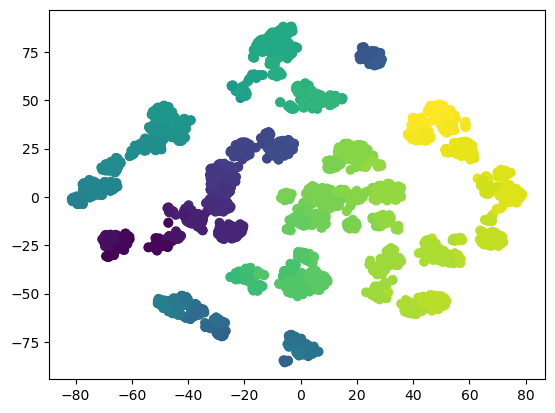

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


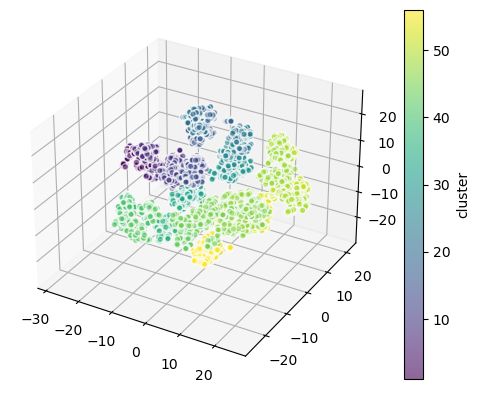

In [31]:
c_tsne(df_scaled, ["labels_complete",
                   "labels_single",
                   "labels_average",
                   "labels_weighted",
                   "labels_centroid",
                   "labels_median", 
                   "labels_ward"])

In [32]:
labels = [column for column in df_scaled.columns if column.startswith("labels_")]

In [33]:
for label in labels:
    print(f'in "{label}" column are {len(df_scaled[label].unique())} clusters')

in "labels_complete" column are 8 clusters
in "labels_single" column are 2 clusters
in "labels_average" column are 6 clusters
in "labels_weighted" column are 9 clusters
in "labels_centroid" column are 10 clusters
in "labels_median" column are 9 clusters
in "labels_ward" column are 56 clusters
